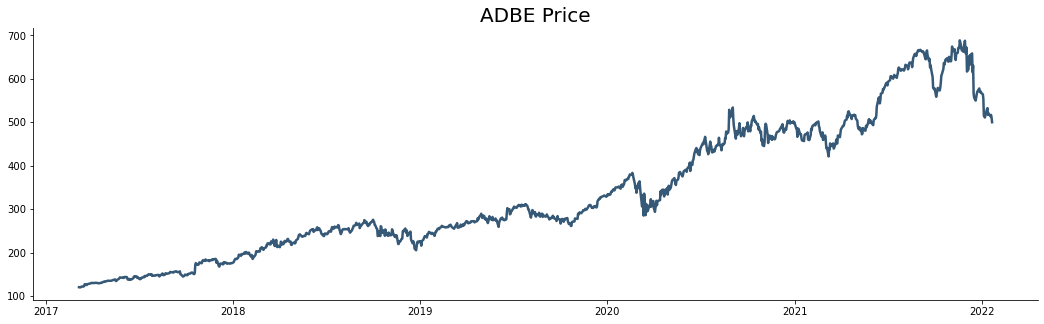

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('adbe.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('ADBE Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,ADBE
Date,
2017-03-06,120.15
2017-03-07,119.98
2017-03-08,119.60
2017-03-09,119.91
2017-03-10,121.09
...,...
2022-01-14,520.60
2022-01-18,513.34
2022-01-19,516.58


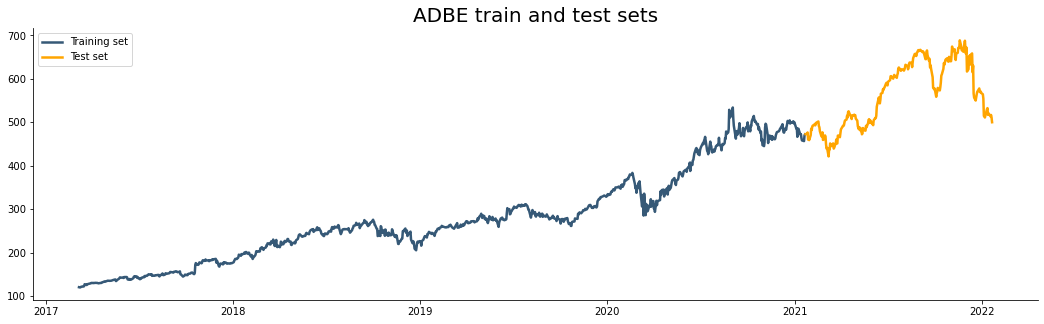

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('ADBE train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,ADBE
Date,
2017-03-06,120.15
2017-03-07,119.98
2017-03-08,119.60
2017-03-09,119.91
2017-03-10,121.09
...,...
2021-01-14,463.27
2021-01-15,458.08
2021-01-19,456.50


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,ADBE
Date,
2021-01-22,472.44
2021-01-25,473.44
2021-01-26,476.28
2021-01-27,460.00
2021-01-28,465.67
...,...
2022-01-14,520.60
2022-01-18,513.34
2022-01-19,516.58


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'ADBE': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'ADBE': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,120.15
1,2017-03-07,119.98
2,2017-03-08,119.60
3,2017-03-09,119.91
4,2017-03-10,121.09


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,904.545541,213.324163,1609.295363,207.589016,1571.081858,25.002423,25.002423,25.002423,26.10173,...,1.413192,1.413192,1.413192,-2.512500,-2.512500,-2.512500,0.0,0.0,0.0,929.547964
755,2023-02-16,905.091397,223.957267,1609.177525,207.055409,1573.143553,25.126577,25.126577,25.126577,26.10173,...,1.649573,1.649573,1.649573,-2.624726,-2.624726,-2.624726,0.0,0.0,0.0,930.217974
756,2023-02-17,905.637253,221.449367,1608.416387,206.521803,1575.205248,24.916786,24.916786,24.916786,26.10173,...,1.632456,1.632456,1.632456,-2.817400,-2.817400,-2.817400,0.0,0.0,0.0,930.554040
757,2023-02-18,906.183110,222.043659,1594.105973,205.985274,1577.266943,19.746166,19.746166,19.746166,26.10173,...,-3.262717,-3.262717,-3.262717,-3.092847,-3.092847,-3.092847,0.0,0.0,0.0,925.929276
758,2023-02-19,906.728966,222.790913,1612.113827,205.432234,1579.328638,19.386271,19.386271,19.386271,26.10173,...,-3.262716,-3.262716,-3.262716,-3.452743,-3.452743,-3.452743,0.0,0.0,0.0,926.115237


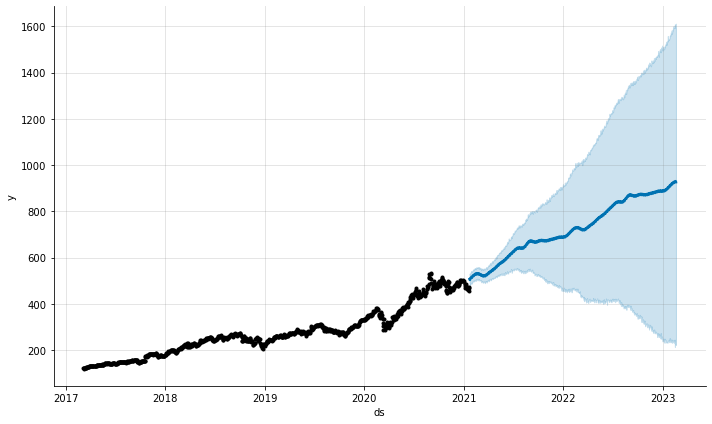

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

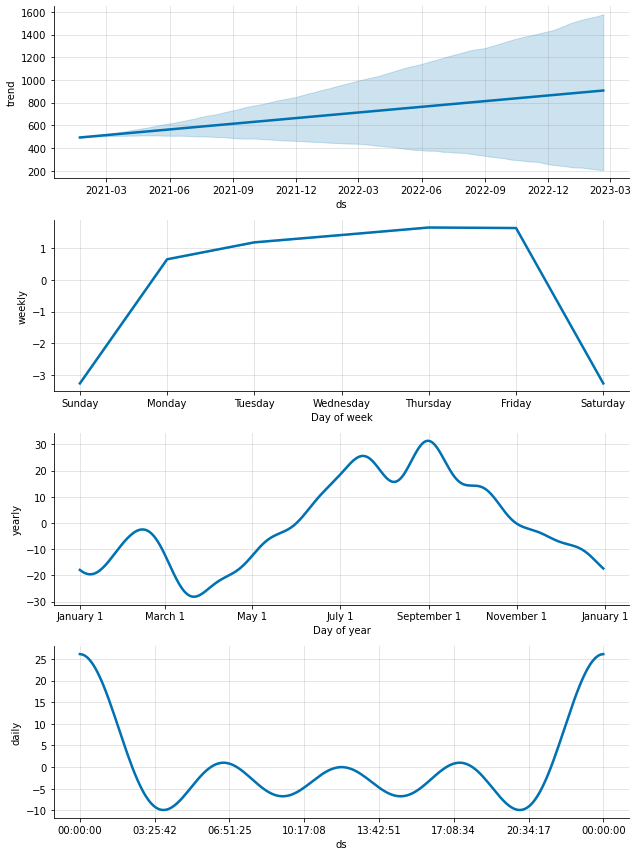

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,ADBE,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,472.44,2021-01-22,492.969926,482.710611,530.166411,492.969926,492.969926,13.763758,13.763758,...,1.632456,1.632456,1.632456,-13.970429,-13.970429,-13.970429,0.0,0.0,0.0,506.733683
1,2021-01-25,473.44,2021-01-25,494.607494,485.091508,535.895123,494.490928,494.615131,14.892690,14.892690,...,0.648558,0.648558,0.648558,-11.857599,-11.857599,-11.857599,0.0,0.0,0.0,509.500184
2,2021-01-26,476.28,2021-01-26,495.153351,486.170847,534.348232,494.936070,495.269693,16.140772,16.140772,...,1.181653,1.181653,1.181653,-11.142611,-11.142611,-11.142611,0.0,0.0,0.0,511.294122
3,2021-01-27,460.00,2021-01-27,495.699207,489.929634,537.007818,495.399444,495.884553,17.084857,17.084857,...,1.413192,1.413192,1.413192,-10.430066,-10.430066,-10.430066,0.0,0.0,0.0,512.784064
4,2021-01-28,465.67,2021-01-28,496.245063,489.165035,537.985064,495.809218,496.606348,18.026991,18.026991,...,1.649573,1.649573,1.649573,-9.724312,-9.724312,-9.724312,0.0,0.0,0.0,514.272054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,520.60,2022-01-14,687.840608,465.012004,968.507289,454.843763,951.432941,9.184040,9.184040,...,1.632456,1.632456,1.632456,-18.550146,-18.550146,-18.550146,0.0,0.0,0.0,697.024648
249,2022-01-18,513.34,2022-01-18,690.024033,460.563316,974.125657,453.359896,960.698246,10.619107,10.619107,...,1.181653,1.181653,1.181653,-16.664276,-16.664276,-16.664276,0.0,0.0,0.0,700.643140
250,2022-01-19,516.58,2022-01-19,690.569889,467.754563,968.119543,452.988929,963.076297,11.434797,11.434797,...,1.413192,1.413192,1.413192,-16.080125,-16.080125,-16.080125,0.0,0.0,0.0,702.004687
251,2022-01-20,510.85,2022-01-20,691.115746,465.267504,964.196013,452.617962,965.455736,12.289989,12.289989,...,1.649573,1.649573,1.649573,-15.461315,-15.461315,-15.461315,0.0,0.0,0.0,703.405734


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,492.969926,480.922292,530.059703,492.969926,492.969926,13.763758,13.763758,13.763758,26.10173,...,1.632456,1.632456,1.632456,-13.970429,-13.970429,-13.970429,0.0,0.0,0.0,506.733683
1,2021-01-23,493.515782,479.458418,527.182428,493.515782,493.515782,9.562610,9.562610,9.562610,26.10173,...,-3.262717,-3.262717,-3.262717,-13.276404,-13.276404,-13.276404,0.0,0.0,0.0,503.078392
2,2021-01-24,494.061638,480.859897,527.341856,494.061638,494.061638,10.268555,10.268555,10.268555,26.10173,...,-3.262716,-3.262716,-3.262716,-12.570460,-12.570460,-12.570460,0.0,0.0,0.0,504.330193
3,2021-01-25,494.607494,484.046470,534.192484,494.607494,494.607494,14.892690,14.892690,14.892690,26.10173,...,0.648558,0.648558,0.648558,-11.857599,-11.857599,-11.857599,0.0,0.0,0.0,509.500184
4,2021-01-26,495.153351,485.982288,535.369351,495.153238,495.194896,16.140772,16.140772,16.140772,26.10173,...,1.181653,1.181653,1.181653,-11.142611,-11.142611,-11.142611,0.0,0.0,0.0,511.294122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,904.545541,213.324163,1609.295363,207.589016,1571.081858,25.002423,25.002423,25.002423,26.10173,...,1.413192,1.413192,1.413192,-2.512500,-2.512500,-2.512500,0.0,0.0,0.0,929.547964
755,2023-02-16,905.091397,223.957267,1609.177525,207.055409,1573.143553,25.126577,25.126577,25.126577,26.10173,...,1.649573,1.649573,1.649573,-2.624726,-2.624726,-2.624726,0.0,0.0,0.0,930.217974
756,2023-02-17,905.637253,221.449367,1608.416387,206.521803,1575.205248,24.916786,24.916786,24.916786,26.10173,...,1.632456,1.632456,1.632456,-2.817400,-2.817400,-2.817400,0.0,0.0,0.0,930.554040
757,2023-02-18,906.183110,222.043659,1594.105973,205.985274,1577.266943,19.746166,19.746166,19.746166,26.10173,...,-3.262717,-3.262717,-3.262717,-3.092847,-3.092847,-3.092847,0.0,0.0,0.0,925.929276


In [26]:
mean_squared_error(df_test.ADBE,df_test.yhat,squared=False)

70.99517574754854

In [27]:
ROI = (499.91/906.728966)*100
ROI

55.13334400304137

# Concating ADBE DF

In [28]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,709.665512
373,2022-01-30,710.895376
374,2022-01-31,716.018741
375,2022-02-01,717.742422
376,2022-02-02,719.139391
...,...,...
754,2023-02-15,929.547964
755,2023-02-16,930.217974
756,2023-02-17,930.554040
757,2023-02-18,925.929276


In [29]:
concat_df.set_index('ds',inplace=True)

In [30]:
concat_df

,yhat
ds,
2022-01-29,709.665512
2022-01-30,710.895376
2022-01-31,716.018741
2022-02-01,717.742422
2022-02-02,719.139391
...,...
2023-02-15,929.547964
2023-02-16,930.217974
2023-02-17,930.554040


In [31]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [32]:
concat_df.columns = ['y']

In [33]:
df_test

,Date,ADBE,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,472.44,2021-01-22,492.969926,482.710611,530.166411,492.969926,492.969926,13.763758,13.763758,...,1.632456,1.632456,1.632456,-13.970429,-13.970429,-13.970429,0.0,0.0,0.0,506.733683
1,2021-01-25,473.44,2021-01-25,494.607494,485.091508,535.895123,494.490928,494.615131,14.892690,14.892690,...,0.648558,0.648558,0.648558,-11.857599,-11.857599,-11.857599,0.0,0.0,0.0,509.500184
2,2021-01-26,476.28,2021-01-26,495.153351,486.170847,534.348232,494.936070,495.269693,16.140772,16.140772,...,1.181653,1.181653,1.181653,-11.142611,-11.142611,-11.142611,0.0,0.0,0.0,511.294122
3,2021-01-27,460.00,2021-01-27,495.699207,489.929634,537.007818,495.399444,495.884553,17.084857,17.084857,...,1.413192,1.413192,1.413192,-10.430066,-10.430066,-10.430066,0.0,0.0,0.0,512.784064
4,2021-01-28,465.67,2021-01-28,496.245063,489.165035,537.985064,495.809218,496.606348,18.026991,18.026991,...,1.649573,1.649573,1.649573,-9.724312,-9.724312,-9.724312,0.0,0.0,0.0,514.272054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,520.60,2022-01-14,687.840608,465.012004,968.507289,454.843763,951.432941,9.184040,9.184040,...,1.632456,1.632456,1.632456,-18.550146,-18.550146,-18.550146,0.0,0.0,0.0,697.024648
249,2022-01-18,513.34,2022-01-18,690.024033,460.563316,974.125657,453.359896,960.698246,10.619107,10.619107,...,1.181653,1.181653,1.181653,-16.664276,-16.664276,-16.664276,0.0,0.0,0.0,700.643140
250,2022-01-19,516.58,2022-01-19,690.569889,467.754563,968.119543,452.988929,963.076297,11.434797,11.434797,...,1.413192,1.413192,1.413192,-16.080125,-16.080125,-16.080125,0.0,0.0,0.0,702.004687
251,2022-01-20,510.85,2022-01-20,691.115746,465.267504,964.196013,452.617962,965.455736,12.289989,12.289989,...,1.649573,1.649573,1.649573,-15.461315,-15.461315,-15.461315,0.0,0.0,0.0,703.405734


In [35]:
df2 = df_test[['Date','ADBE']]

In [36]:
df2.set_index('Date',inplace=True)

In [37]:
temp_ds = ts.set_index('ds')

In [38]:
df2.columns = ['y']

In [39]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,120.150000
2017-03-07,119.980000
2017-03-08,119.600000
2017-03-09,119.910000
2017-03-10,121.090000
...,...
2023-02-15,929.547964
2023-02-16,930.217974
2023-02-17,930.554040
2023-02-18,925.929276


In [40]:
final_df.to_csv('AAPL_final.csv')

In [43]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

concat_df.set_index('ds',inplace=True)

concat_df

concat_df.info()

concat_df.columns = ['y']

df_test

df2 = df_test[['Date','ADBE']]

df2.set_index('Date',inplace=True)

temp_ds = ts.set_index('ds')

df2.columns = ['y']

final_df= pd.concat([temp_ds,df2,concat_df])
final_df

final_df.to_csv('ADBE_final.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB
